### Load and Display Student Data

As the first step, we will load the data from a CSV file using the pandas library. 

In [3]:
import pandas as pd

# Load the data from a CSV file
file_path = r"C:\tmp\daten_bereinigt_v2.csv"
data = pd.read_csv(file_path, sep=';')


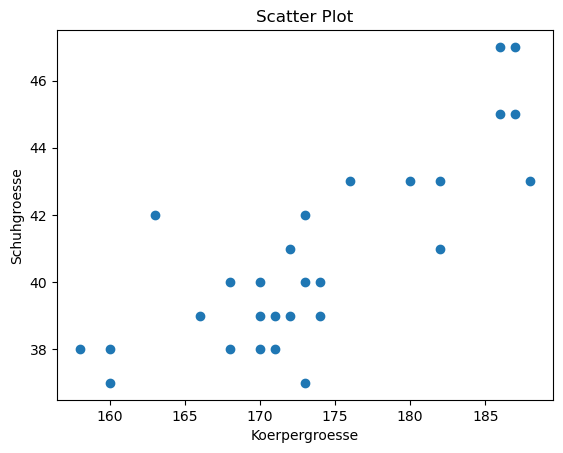

In [5]:
import matplotlib.pyplot as plt

# Extract columns to variables x and y
x = data['Koerpergroesse']
y = data['Schuhgroesse']

# Create a scatter plot
plt.scatter(x, y)
plt.xlabel('Koerpergroesse')
plt.ylabel('Schuhgroesse')
plt.title('Scatter Plot')
plt.show()